### Getting and cleaning the data

In [1]:
source("loadData.R")

# load and clean the data
raw <- loadData()

"Raw data:"
format(head(raw,3), digits=3)

clean <- cleanData(raw)

"Cleaned data:"
format(head(clean,3), digits=3)

dataPrime <- data.frame()
wells <- unique(clean$Well.Name)

for (well_i in wells) {
    data_i <- clean[clean$Well.Name == well_i,]
    
    data_i$GR <- (data_i$GR - mean(data_i$GR, na.rm=T)) / sd(data_i$GR, na.rm=T)
    data_i$ILD_log10 <- (data_i$ILD_log10 - mean(data_i$ILD_log10, na.rm=T)) / sd(data_i$ILD_log10, na.rm=T)
    data_i$DeltaPHI <- (data_i$DeltaPHI - mean(data_i$DeltaPHI, na.rm=T)) / sd(data_i$DeltaPHI, na.rm=T)
    data_i$PHIND <- (data_i$PHIND - mean(data_i$PHIND, na.rm=T)) / sd(data_i$PHIND, na.rm=T)
    data_i$PE <- (data_i$PE - mean(data_i$PE, na.rm=T)) / sd(data_i$PE, na.rm=T)
    
    dataPrime <- rbind(dataPrime, data_i)
}

cs <- dataPrime
rm(dataPrime)

"Centered and scaled data:"
format(head(cs,3), digits=3)

[1] "Raw data:"

Facies,Formation,Well.Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
3,A1 SH,SHRIMPLIN,2793,77.5,0.664,9.9,11.9,4.6,1,1.000
3,A1 SH,SHRIMPLIN,2794,78.3,0.661,14.2,12.6,4.1,1,0.979
3,A1 SH,SHRIMPLIN,2794,79.0,0.658,14.8,13.1,3.6,1,0.957


[1] "Cleaned data:"

Facies,Formation,Well.Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,isMarine,RELPOS
FSiS,A1 SH,SHRIMPLIN,2793,77.5,0.664,9.9,11.9,4.6,FALSE,1.000
FSiS,A1 SH,SHRIMPLIN,2794,78.3,0.661,14.2,12.6,4.1,FALSE,0.979
FSiS,A1 SH,SHRIMPLIN,2794,79.0,0.658,14.8,13.1,3.6,FALSE,0.957


[1] "Centered and scaled data:"

Facies,Formation,Well.Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,isMarine,RELPOS
FSiS,A1 SH,SHRIMPLIN,2793,0.216,0.01855,0.512,-0.0487,0.421,FALSE,1.000
FSiS,A1 SH,SHRIMPLIN,2794,0.237,0.00567,1.517,0.0736,-0.133,FALSE,0.979
FSiS,A1 SH,SHRIMPLIN,2794,0.258,-0.00721,1.657,0.1648,-0.687,FALSE,0.957


### Conditioning the data

In [2]:
df <- cs

df$FmTemp <- as.factor(apply(df, MARGIN = 1, FUN = function(x) {strsplit(as.character(x["Formation"]), split=" ")[[1]][1]}))
df$FmType <- as.factor(apply(df, MARGIN = 1, FUN = function(x) {strsplit(as.character(x["Formation"]), split=" ")[[1]][2]}))

format(head(cs, 3), digits=3)
format(head(df, 3), digits=3)

df$Sequence <- NA
df$FmName <- NA
for (i in 1:nrow(df)) {
    if (nchar(as.character(df$FmTemp[i])) > 1) {
        temp <- df$FmTemp[i]
        df$Sequence[i] <- as.character(substr(temp, 2, 2))
        df$FmName[i] <- as.character(substr(temp, 1, 1))
    } else {
        temp <- df$FmTemp[i]
        df$Sequence[i] <- "1"
        df$FmName[i] <- as.character(temp)
    }
}
df$Sequence <- as.factor(df$Sequence)
df$FmName <- as.factor(df$FmName)
df <- subset(df, select=-c(FmTemp))

format(head(df, 3), digits=3)

Facies,Formation,Well.Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,isMarine,RELPOS
FSiS,A1 SH,SHRIMPLIN,2793,0.216,0.01855,0.512,-0.0487,0.421,FALSE,1.000
FSiS,A1 SH,SHRIMPLIN,2794,0.237,0.00567,1.517,0.0736,-0.133,FALSE,0.979
FSiS,A1 SH,SHRIMPLIN,2794,0.258,-0.00721,1.657,0.1648,-0.687,FALSE,0.957


Facies,Formation,Well.Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,isMarine,RELPOS,FmTemp,FmType
FSiS,A1 SH,SHRIMPLIN,2793,0.216,0.01855,0.512,-0.0487,0.421,FALSE,1.000,A1,SH
FSiS,A1 SH,SHRIMPLIN,2794,0.237,0.00567,1.517,0.0736,-0.133,FALSE,0.979,A1,SH
FSiS,A1 SH,SHRIMPLIN,2794,0.258,-0.00721,1.657,0.1648,-0.687,FALSE,0.957,A1,SH


Facies,Formation,Well.Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,isMarine,RELPOS,FmType,Sequence,FmName
FSiS,A1 SH,SHRIMPLIN,2793,0.216,0.01855,0.512,-0.0487,0.421,FALSE,1.000,SH,1,A
FSiS,A1 SH,SHRIMPLIN,2794,0.237,0.00567,1.517,0.0736,-0.133,FALSE,0.979,SH,1,A
FSiS,A1 SH,SHRIMPLIN,2794,0.258,-0.00721,1.657,0.1648,-0.687,FALSE,0.957,SH,1,A


### Exploratory data analysis

[1] "By formation:"

       
         SS CSiS FSiS SiSh  MS  WS   D  PS  BS
  A1 LM   0    0    4  153  48 222  21 137   6
  A1 SH  82  216  111    0   6   0   0   1   6
  B1 LM   0    0    0    3  19  61   8 119   0
  B1 SH  48  160  125    2   0   0   0   0   0
  B2 LM   0    0    0    1  12  36  11  84  32
  B2 SH  28   92   85    2   4   0   1   0   0
  B3 LM   0    0    0    0   4   5  15  49   1
  B3 SH  33  152   85    0   0   0   0   0   0
  B4 LM   0    0    0    3  14  27   0  44   0
  B4 SH  77  155   27    0   0   0   0   0   0
  B5 LM   0    0    0    3  23  41  69 132  94
  B5 SH   0    8   86    0   2   0   0   0   0
  C LM    0    8   14  104 164 190  16 120  46
  C SH    0  149  243    0   0   0   0   0   0

[1] "By formation name:"

   
     SS CSiS FSiS SiSh  MS  WS   D  PS  BS
  A  82  216  115  153  54 222  21 138  12
  B 186  567  408   14  78 170 104 428 127
  C   0  157  257  104 164 190  16 120  46

[1] "By formation sequence:"

   
     SS CSiS FSiS SiSh  MS  WS   D  PS  BS
  1 130  533  497  262 237 473  45 377  58
  2  28   92   85    3  16  36  12  84  32
  3  33  152   85    0   4   5  15  49   1
  4  77  155   27    3  14  27   0  44   0
  5   0    8   86    3  25  41  69 132  94

[1] "By formation type:"

    
      SS CSiS FSiS SiSh  MS  WS   D  PS  BS
  LM   0    8   18  267 284 582 140 685 179
  SH 268  932  762    4  12   0   1   1   6

[1] "By isMarine:"

       
         SS CSiS FSiS SiSh  MS  WS   D  PS  BS
  FALSE 268  934  764    5  11   3   1  12   0
  TRUE    0    6   16  266 285 579 140 674 185

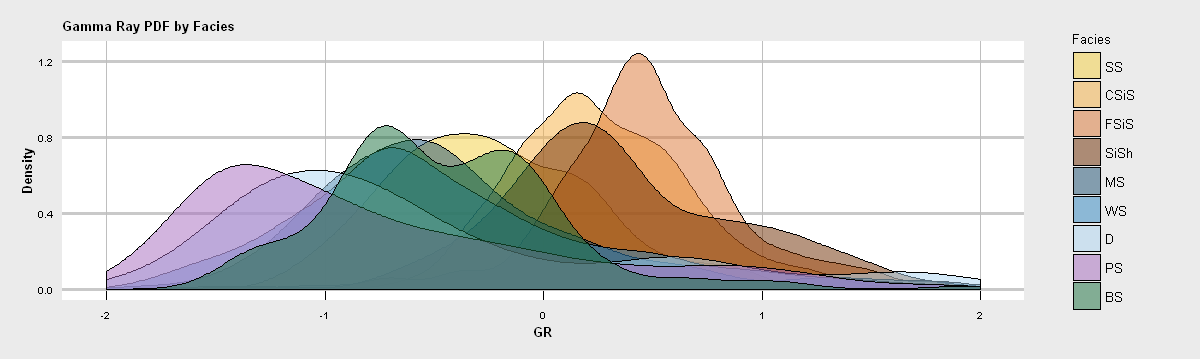

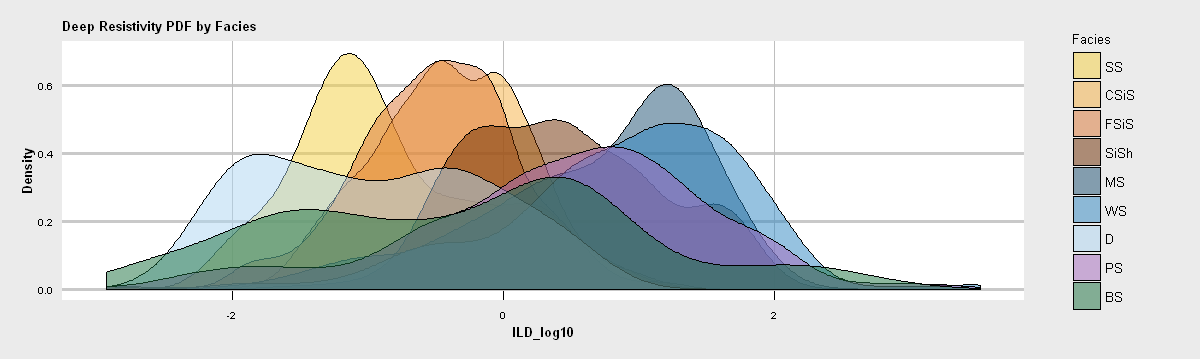

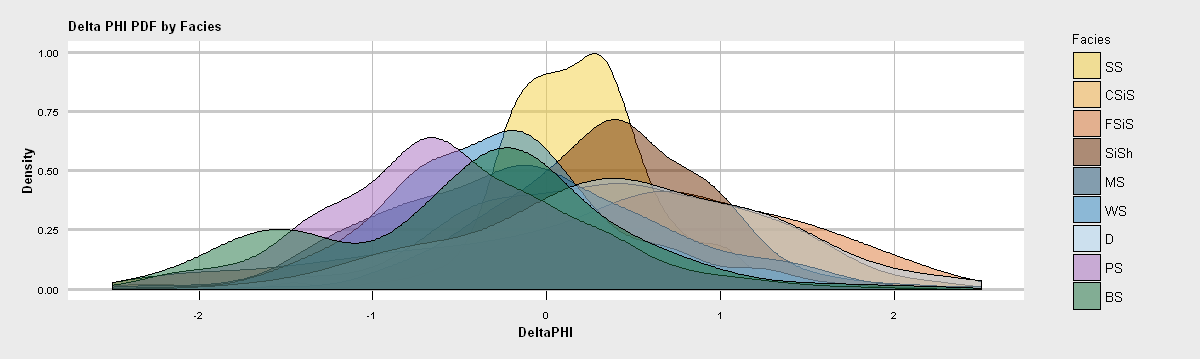

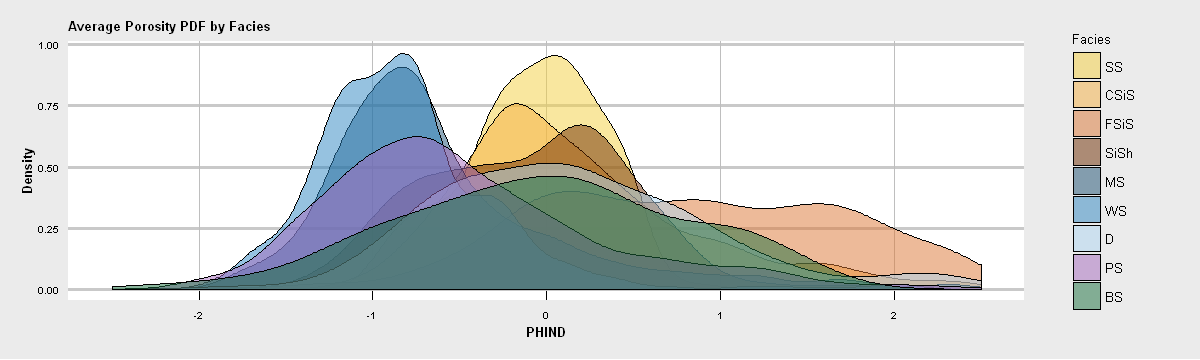

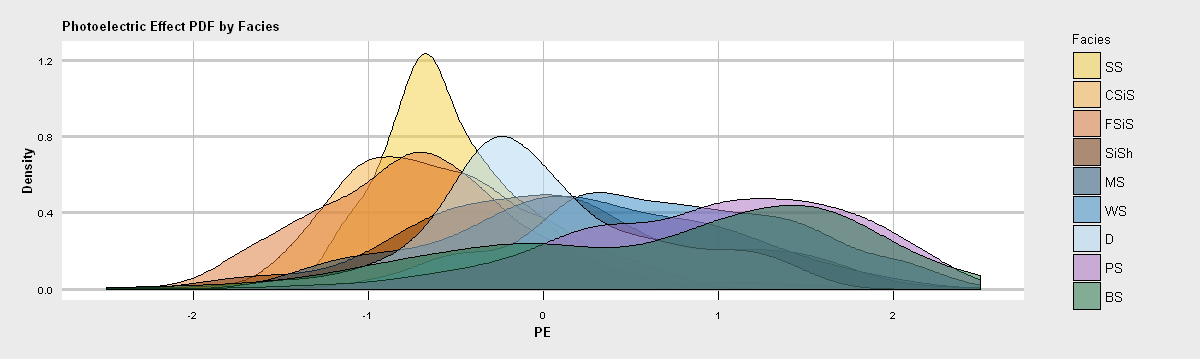

In [3]:
library(ggplot2)
library(ggthemes)
options(repr.plot.width=10, repr.plot.height=3, warn=-1)

"By formation:"
table(df$Formation, df$Facies)

"By formation name:"
table(df$FmName, df$Facies)

"By formation sequence:"
table(df$Sequence, df$Facies)

"By formation type:"
table(df$FmType, df$Facies)

"By isMarine:"
table(df$isMarine, df$Facies)

facies_colors <- c('#F4D03F', '#F5B041', '#DC7633', '#6E2C00', '#1B4F72', '#2E86C1', '#AED6F1', '#A569BD', '#196F3D')
facies_labels <- c('SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS')

ggplot(df, aes(GR, fill=Facies)) + geom_density(alpha=.5) + theme_economist_white(gray_bg=T) +
    scale_fill_manual(values=facies_colors, drop=F, labels=facies_labels) +
    labs(x="GR", y="Density", title="Gamma Ray PDF by Facies") +
    xlim(-2,2) +
   theme(panel.grid.major.x = element_line(colour="gray", size=0.25), legend.position="right", 
              axis.text=element_text(size=6), axis.title=element_text(size=8,face="bold"), plot.title=element_text(size=8),
              legend.title=element_text(size=8), legend.text=element_text(size=8))

ggplot(df, aes(ILD_log10, fill=Facies)) + geom_density(alpha=.5) + theme_economist_white(gray_bg=T) +
    scale_fill_manual(values=facies_colors, drop=F, labels=facies_labels) +
    labs(x="ILD_log10", y="Density", title="Deep Resistivity PDF by Facies") +
   theme(panel.grid.major.x = element_line(colour="gray", size=0.25), legend.position="right", 
              axis.text=element_text(size=6), axis.title=element_text(size=8,face="bold"), plot.title=element_text(size=8),
              legend.title=element_text(size=8), legend.text=element_text(size=8))

ggplot(df, aes(DeltaPHI, fill=Facies)) + geom_density(alpha=.5) + theme_economist_white(gray_bg=T) +
    scale_fill_manual(values=facies_colors, drop=F, labels=facies_labels) +
    labs(x="DeltaPHI", y="Density", title="Delta PHI PDF by Facies") +
    xlim(-2.5,2.5) +
   theme(panel.grid.major.x = element_line(colour="gray", size=0.25), legend.position="right", 
              axis.text=element_text(size=6), axis.title=element_text(size=8,face="bold"), plot.title=element_text(size=8),
              legend.title=element_text(size=8), legend.text=element_text(size=8))

ggplot(df, aes(PHIND, fill=Facies)) + geom_density(alpha=.5) + theme_economist_white(gray_bg=T) +
    scale_fill_manual(values=facies_colors, drop=F, labels=facies_labels) +
    labs(x="PHIND", y="Density", title="Average Porosity PDF by Facies") +
    xlim(-2.5,2.5) +
   theme(panel.grid.major.x = element_line(colour="gray", size=0.25), legend.position="right", 
              axis.text=element_text(size=6), axis.title=element_text(size=8,face="bold"), plot.title=element_text(size=8),
              legend.title=element_text(size=8), legend.text=element_text(size=8))

ggplot(df, aes(PE, fill=Facies)) + geom_density(alpha=.5) + theme_economist_white(gray_bg=T) +
    scale_fill_manual(values=facies_colors, drop=F, labels=facies_labels) +
    labs(x="PE", y="Density", title="Photoelectric Effect PDF by Facies") +
    xlim(-2.5,2.5) +
   theme(panel.grid.major.x = element_line(colour="gray", size=0.25), legend.position="right", 
              axis.text=element_text(size=6), axis.title=element_text(size=8,face="bold"), plot.title=element_text(size=8),
              legend.title=element_text(size=8), legend.text=element_text(size=8))

### Feature generation

In [4]:
# formation depth
wells <- unique(df$Well.Name)

df$FmThickness <- NA
df$FmRelDepth <- NA
df$isMarineThickness <- 0

for (i in wells) {
    df_i <- df[df$Well.Name == i,]
    formations <- unique(df_i$Formation)
    
    for (j in formations) {
        df_ij <- df_i[df_i$Formation == j,]
        
        # formation thickness & formation depth
        maxdepth <- max(df_ij$Depth)
        mindepth <- min(df_ij$Depth)
        df[df$Well.Name == i & df$Formation == j, "FmThickness"] <- maxdepth - mindepth
        df[df$Well.Name == i & df$Formation == j, "FmRelDepth"] <- (df_ij$Depth - mindepth) / (maxdepth - mindepth)
        
        # basic statistics on features
        #features <- c("Depth", "GR", "ILD_log10", "DeltaPHI", "PHIND", "PE", "RELPOS")
        #for (f in features) {
        #    df[df$Well.Name == i & df$Formation == j, paste(f, "_mean")] <- mean(df_ij[,f], na.rm=T)
        #    df[df$Well.Name == i & df$Formation == j, paste(f, "_sd")] <- sd(df_ij[,f], na.rm=T)
        #    df[df$Well.Name == i & df$Formation == j, paste(f, "_min")] <- min(df_ij[,f], na.rm=T)
        #    df[df$Well.Name == i & df$Formation == j, paste(f, "_max")] <- max(df_ij[,f], na.rm=T)
        #}
    }
    
    # thickness and relative depth for isMarine unit
    isMarine_prev <- df_i$isMarine[1]
    isMarine_cur <- NULL
    iStart <- NULL
    for (z in 1:nrow(df_i)) {
        isMarine_cur <- df_i$isMarine[z]
        
        if (z == 1) {
            iStart <- df_i$Depth[z]
            isMarine_cur <- df_i$isMarine[z]
        } else if (isMarine_cur != isMarine_prev | z == nrow(df_i)) {
            df[df$Well.Name == i & df$Depth >= iStart & 
               df$Depth < df$Depth[z], "isMarineThickness"] <- df_i$Depth[z] - iStart
            df[df$Well.Name == i & df$Depth >= iStart &
               df$Depth < df$Depth[z], "isMarineRelDepth"] <- (df[df$Well.Name == i & 
                                                                  df$Depth >= iStart & 
                                                                  df$Depth < df$Depth[z],]$Depth - 
                                                               iStart) / 
                                                              (df_i$Depth[z] - iStart)
            
            iStart <- df_i$Depth[z]
        } 
        
        isMarine_prev <- isMarine_cur
    }
}

format(head(df, 5), digits=3)

Facies,Formation,Well.Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,isMarine,RELPOS,FmType,Sequence,FmName,FmThickness,FmRelDepth,isMarineThickness,isMarineRelDepth
FSiS,A1 SH,SHRIMPLIN,2793,0.216,0.01855,0.512,-0.0487,0.421,FALSE,1.000,SH,1,A,21,0.0000,21.5,0.0000
FSiS,A1 SH,SHRIMPLIN,2794,0.237,0.00567,1.517,0.0736,-0.133,FALSE,0.979,SH,1,A,21,0.0238,21.5,0.0233
FSiS,A1 SH,SHRIMPLIN,2794,0.258,-0.00721,1.657,0.1648,-0.687,FALSE,0.957,SH,1,A,21,0.0476,21.5,0.0465
FSiS,A1 SH,SHRIMPLIN,2794,0.447,-0.02009,1.447,0.1770,-0.797,FALSE,0.936,SH,1,A,21,0.0714,21.5,0.0698
FSiS,A1 SH,SHRIMPLIN,2795,0.139,-0.05444,1.353,0.2118,-0.908,FALSE,0.915,SH,1,A,21,0.0952,21.5,0.0930


### Cross-validation

Rattle: A free graphical interface for data mining with R.
Version 4.1.0 Copyright (c) 2006-2015 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


testWell1,testWell2,f1
SHRIMPLIN,ALEXANDER D,0.576
SHRIMPLIN,SHANKLE,0.520
SHRIMPLIN,LUKE G U,0.574
SHRIMPLIN,KIMZEY A,0.532
SHRIMPLIN,CROSS H CATTLE,0.454
SHRIMPLIN,NOLAN,0.547
SHRIMPLIN,NEWBY,0.552
SHRIMPLIN,CHURCHMAN BIBLE,0.529
ALEXANDER D,SHANKLE,0.550
ALEXANDER D,LUKE G U,0.560


[1] "We can expect an F1-score on average to be:"

[1] 0.5161134


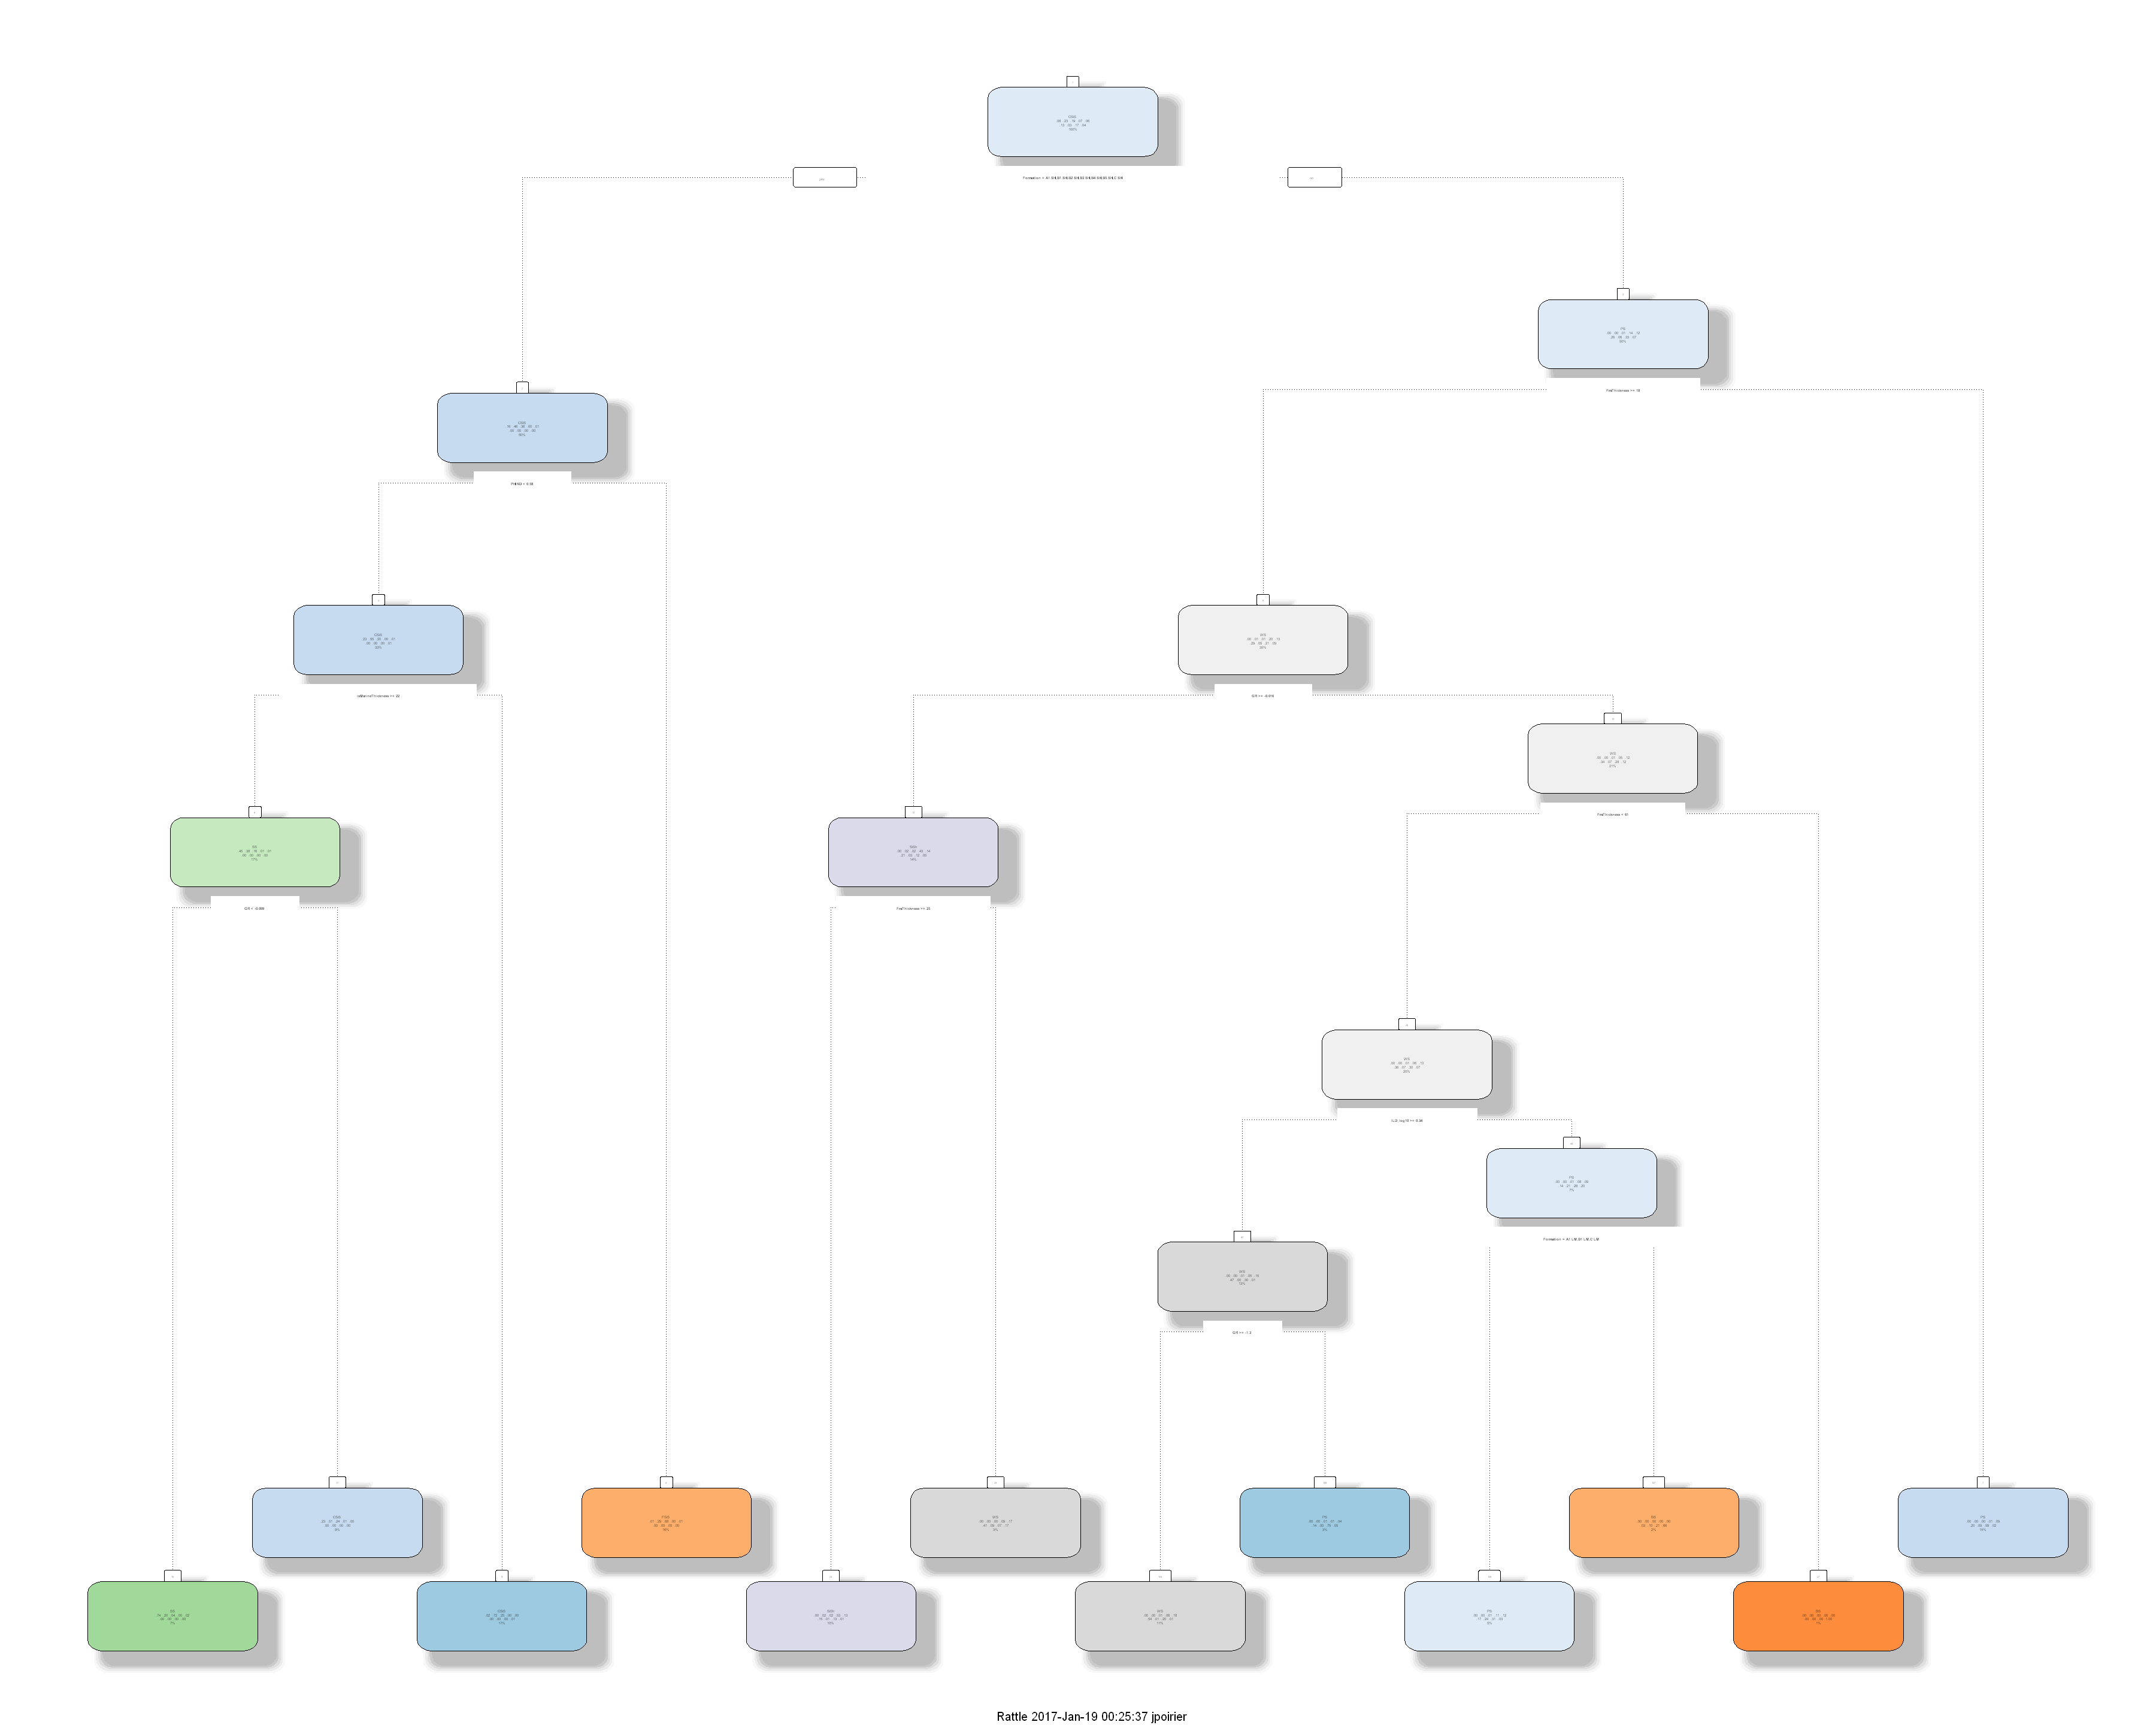

In [5]:
options(repr.plot.width=30, repr.plot.height=24)

library(rpart)
library(rattle)
library(rpart.plot)
library(RColorBrewer)
source("accuracyMetrics.R")

wells <- unique(df$Well.Name)
wells <- wells[!wells %in% c("Recruit F9")]
results <- data.frame()

for (i in 1:(length(wells)-1)) {
    for (j in (i+1):length(wells)) {
        train <- df[df$Well.Name != wells[i] & df$Well.Name != wells[j],]
        test <- df[df$Well.Name == wells[i] | df$Well.Name == wells[j],]
        
        fit <- rpart(Facies ~ ., data=subset(train, select=-c(Well.Name, Depth)), method="class")
        my_predictions <- predict(fit, newdata=test, type="class")
        
        if(wells[i] == "SHRIMPLIN" & wells[j] == "CHURCHMAN BIBLE") {
            fancyRpartPlot(fit)
        }
        
        f1 <- myF1Metric(my_predictions, test$Facies)
        
        results <- rbind(results, data.frame(testWell1=wells[i], testWell2=wells[j], f1=f1))
    }
}

format(head(results,10), digits=3)

"We can expect an F1-score on average to be:"
print(mean(results$f1))